# Resonance-Poisson Kernel Convolution

The Poisson kernel is given by:
$$P_y(x) = \frac{y}{\pi(x^2+y^2)}$$
This just so happens to match the form of the SLBW resonance equation (removing $\pi$, $g$, etc.), off only by a scalar multiplier:
$$f(x)=\frac{\Gamma_n\Gamma_\gamma}{((x-E)^2+(\frac{\Gamma_n+\Gamma_\gamma}{2})^2)}$$

## Extension to the Upper-half Complex Plane

If we convolve the resonance with the Poisson kernel, we get a holomorphic/harmonic/analytical extention of the resonance to the upper complex plane. The resonance function, $f$, can be extended to the complex plane, giving:
$$g(z)=\left(\frac{\Gamma_n\Gamma_\gamma}{\Gamma_n+\Gamma_\gamma}\right)\frac{i(\bar{z}-\bar{z}_0)}{|z-z_0|^2}$$
$$g(z)=\left(\frac{\Gamma_n\Gamma_\gamma}{\Gamma_n+\Gamma_\gamma}\right)\frac{i}{z-z_0}$$
Where $z=x+iy$ and $z_0=E-i(\Gamma_n+\Gamma_\gamma)/2$.

Note that the real part is:
$$\Re[g(z)]=-\left(\frac{\Gamma_n\Gamma_\gamma}{\Gamma_n+\Gamma_\gamma}\right)\frac{\Im[\bar{z}-\bar{z}_0]}{|z-z_0|^2}=\left(\frac{\Gamma_n\Gamma_\gamma}{\Gamma_n+\Gamma_\gamma}\right)\frac{\Im[z-z_0]}{|z-z_0|^2}=\left(\frac{\Gamma_n\Gamma_\gamma}{\Gamma_n+\Gamma_\gamma}\right)\frac{y+(\Gamma_n+\Gamma_\gamma)/2}{|z-z_0|^2}$$

By convolving $f(x)$ with $P_y(x)$, we get $Re(g(x+iy))$ for $y>0$.

## Analytical form of the Convolution

Consider a resonance written in the form:
$$f(x)=\frac{A(x-E)+B}{(x-E)^2+C^2}$$
Then the convolution with a kernel, $P_y$, is:
$$[f*P_y](x)=\frac{A'(x-E)+B'}{(x-E)^2+(C+y)^2}$$
Where $A'=Ay$ and $B'=B\frac{C+y}{C}$. This follows from the equation written in the previous section.

## Stochastic Noise and the Poisson Kernel

The Poisson kernel is used to signal denoising due to its rapid blurring affect.

# Importing and Initializing Python

In [5]:
import numpy as np
from scipy.integrate import cumtrapz
from scipy.interpolate import interp2d
from scipy.signal import fftconvolve as convolve
from scipy.signal import deconvolve as deconvolve
import matplotlib.pyplot as plt
%matplotlib widget
import seaborn as sb

# Poisson Extension to Upper Plane
### Heatmaps of the Extension

(100, 200)


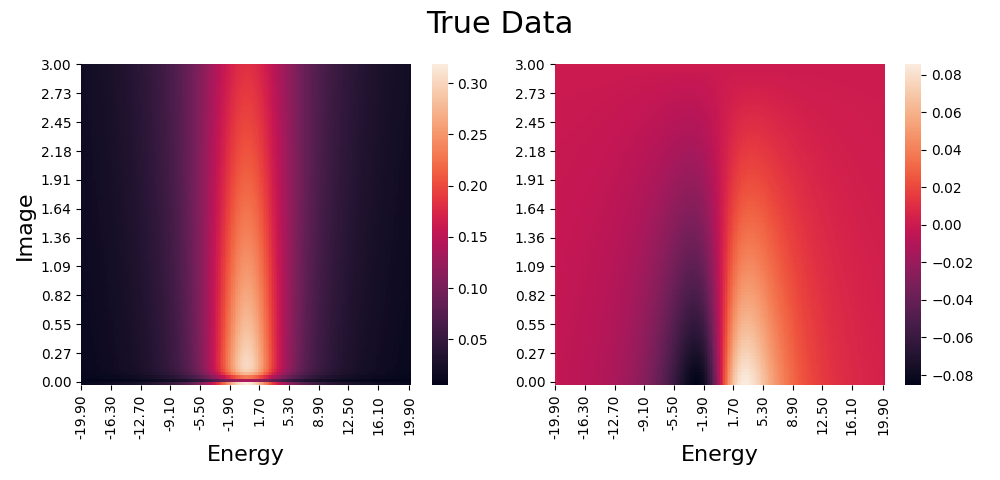

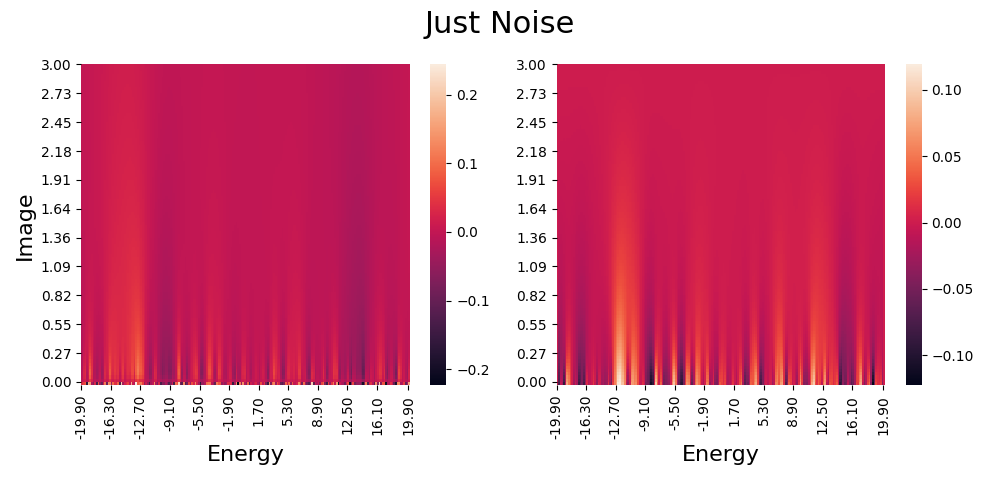

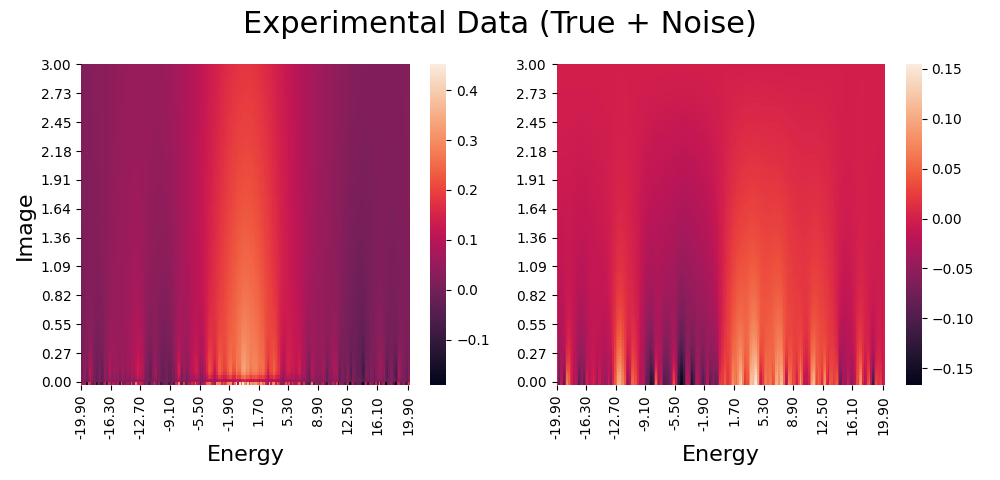

In [6]:

G1 = 4 # Width 1
G2 = 4 # Width 2
std_noise = 0.1 # Noise

N = 10000  # Number of X-points
M = 100    # Number of Y-points
B = 200    # Plotted x-region (number of points)
theta = 0*np.pi/180 # Rotation of the Kernel

X = np.linspace(-1000,1000,N)
Y = np.linspace(0,3,M)
b = int(B/2)

def res_peak(E,G1,G2):
    return G1*G2/(np.pi*(E**2+((G1+G2)/2)**2))

FT  = res_peak(X,G1,G2)
FTC = np.tile(FT.reshape(-1,1), (1,M))

FN  = np.random.normal(0,std_noise,N)
FNC = np.tile(FN.reshape(-1,1), (1,M))

FE = FT + FN
FEC = np.tile(FE.reshape(-1,1), (1,M))

def PoissonKernel(x,y,theta):
    if type(y) != float:
        x = x.reshape(-1,1)
        y = y.reshape(1,-1)
    # return y/(np.pi*(x**2+y**2))
    return (x*np.sin(theta)+y*np.cos(theta))/(np.pi*(x**2+y**2))
def PoissonTransform(F,X,Y,theta):
    dx = X[1] - X[0]
    return np.real(convolve(F, PoissonKernel(X,Y,theta), mode='same', axes=0)) * dx
Z = X.reshape(-1,1)+1j*Y.reshape(1,-1)
GT = PoissonTransform(FTC,X,Y,theta)
GN = PoissonTransform(FNC,X,Y,theta)
GE = PoissonTransform(FEC,X,Y,theta)
GT[:,0] = FT;  GN[:,0] = FN;  GE[:,0] = FE

cIdx = int(N/2)
XR = X[cIdx-b:cIdx+b]
YR = np.flip(Y)
GTR = np.flip(GT[cIdx-b:cIdx+b,:].T, axis=0)
GNR = np.flip(GN[cIdx-b:cIdx+b,:].T, axis=0)
GER = np.flip(GE[cIdx-b:cIdx+b,:].T, axis=0)

GTI = np.zeros(GTR.shape)
GNI = np.zeros(GNR.shape)
GEI = np.zeros(GER.shape)

GTI[1:,1:-1] = cumtrapz((GTR[:,2:]-GTR[:,:-2])/(XR[2:]-XR[:-2]).reshape(1,-1), YR.reshape(-1,1), axis=0)
GNI[1:,1:-1] = cumtrapz((GNR[:,2:]-GNR[:,:-2])/(XR[2:]-XR[:-2]).reshape(1,-1), YR.reshape(-1,1), axis=0)
GEI[1:,1:-1] = cumtrapz((GER[:,2:]-GER[:,:-2])/(XR[2:]-XR[:-2]).reshape(1,-1), YR.reshape(-1,1), axis=0)

print(GTI.shape)

# Plotting Heatmaps:
settings = {'linewidths':0.0, 'linecolor':'k', 'annot':False}
num_ticks = (12,12)

# the index of the position of yticks
xticks = np.linspace(0, len(XR) - 1, num_ticks[0], dtype=int)
yticks = np.linspace(0, len(YR) - 1, num_ticks[1], dtype=int)
# the content of labels of these yticks
xticklabels = [f'{XR[idx]:.2f}' for idx in xticks]
yticklabels = [f'{YR[idx]:.2f}' for idx in yticks]

# Closing Previous Figures:
plt.close('all')

# True cross-section
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figwidth(10);   fig.set_figheight(4.8)
ax1 = sb.heatmap(GTR, ax=ax1, **settings)
ax1.set_xticks(xticks)
ax1.set_xticklabels(xticklabels)
ax1.set_yticks(yticks)
ax1.set_yticklabels(yticklabels)
ax1.set_xlabel('Energy', fontsize=16)
ax1.set_ylabel('Image', fontsize=16)
ax2 = sb.heatmap(GTI, ax=ax2, **settings)
ax2.set_xticks(xticks)
ax2.set_xticklabels(xticklabels)
ax2.set_yticks(yticks)
ax2.set_yticklabels(yticklabels)
fig.suptitle('True Data', fontsize=22)
ax2.set_xlabel('Energy', fontsize=16)
fig.tight_layout()

# Just Noise:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figwidth(10);   fig.set_figheight(4.8)
ax1 = sb.heatmap(GNR, ax=ax1, **settings)
ax1.set_xticks(xticks)
ax1.set_xticklabels(xticklabels)
ax1.set_yticks(yticks)
ax1.set_yticklabels(yticklabels)
ax1.set_xlabel('Energy', fontsize=16)
ax1.set_ylabel('Image', fontsize=16)
ax2 = sb.heatmap(GNI, ax=ax2, **settings)
ax2.set_xticks(xticks)
ax2.set_xticklabels(xticklabels)
ax2.set_yticks(yticks)
ax2.set_yticklabels(yticklabels)
fig.suptitle('Just Noise', fontsize=22)
ax2.set_xlabel('Energy', fontsize=16)
fig.tight_layout()

# Experimental Data:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figwidth(10);   fig.set_figheight(4.8)
ax1 = sb.heatmap(GER, ax=ax1, **settings)
ax1.set_xticks(xticks)
ax1.set_xticklabels(xticklabels)
ax1.set_yticks(yticks)
ax1.set_yticklabels(yticklabels)
ax1.set_xlabel('Energy', fontsize=16)
ax1.set_ylabel('Image', fontsize=16)
ax2 = sb.heatmap(GEI, ax=ax2, **settings)
ax2.set_xticks(xticks)
ax2.set_xticklabels(xticklabels)
ax2.set_yticks(yticks)
ax2.set_yticklabels(yticklabels)
fig.suptitle('Experimental Data (True + Noise)', fontsize=22)
ax2.set_xlabel('Energy', fontsize=16)
fig.tight_layout()

# GTC = GTR + 1j*GTI
# GNC = GNR + 1j*GNI
# GEC = GER + 1j*GEI

# def func(XP,YP,GP):
#         G_interp = interp2d(XP,YP,GP)
#         return lambda z: np.diag(G_interp(-np.real(z),np.imag(z)))

# def trace(t):
#     z  = 1.5+np.exp(2j*np.pi*t)
#     zp = 2j*np.pi*np.exp(2*np.pi*t)
#     return z#,zp

# z = trace(np.linspace(0,1,10000))
# GT_func = func(XR,YR,GTC)

# CauchyThing = np.trapz(GT_func(z),z)
# print(CauchyThing)

### Comparison on the Real Part

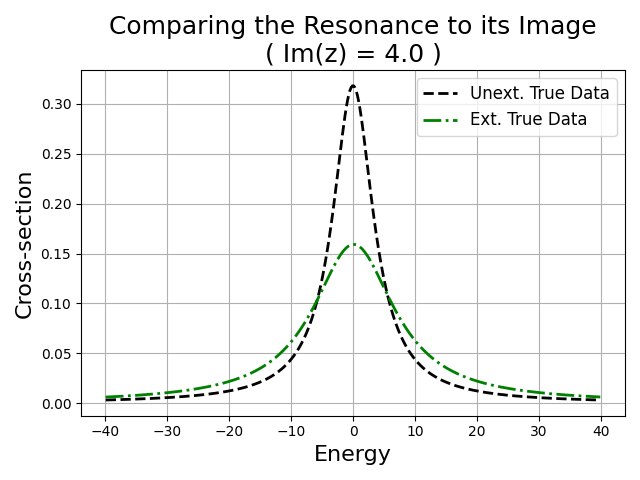

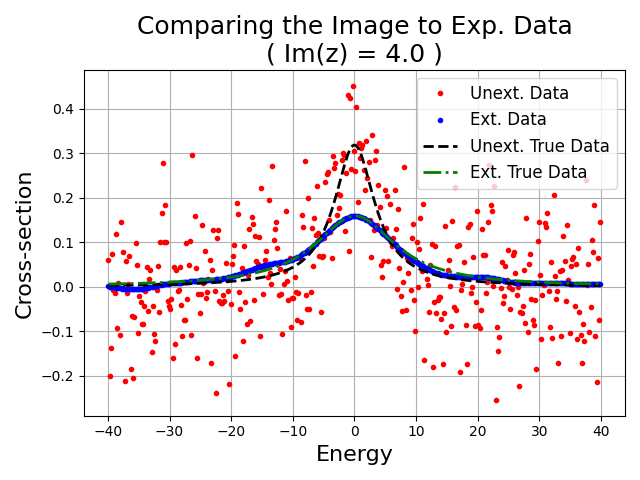

In [7]:
y = 4.0

GE = PoissonTransform(FE,X,y,theta)
GT = PoissonTransform(FT,X,y,theta)

cIdx = int(N/2)
XR = X[cIdx-B:cIdx+B]
FER = FE[cIdx-B:cIdx+B]
FTR = FT[cIdx-B:cIdx+B]
GER = GE[cIdx-B:cIdx+B]
GTR = GT[cIdx-B:cIdx+B]

plt.figure(42)
plt.clf()
plt.plot(XR,FTR,'--k', linewidth=2, label='Unext. True Data')
plt.plot(XR,GTR,'-.g', linewidth=2, label='Ext. True Data')
plt.grid()
plt.legend(fontsize=12)
plt.title(f'Comparing the Resonance to its Image\n( Im(z) = {y} )', fontsize=18)
plt.xlabel('Energy', fontsize=16)
plt.ylabel('Cross-section', fontsize=16)
plt.tight_layout()
plt.show()

plt.figure(43)
plt.clf()
plt.plot(XR,FER,'.r', label='Unext. Data')
plt.plot(XR,GER,'.b', label='Ext. Data')
plt.plot(XR,FTR,'--k', linewidth=2, label='Unext. True Data')
plt.plot(XR,GTR,'-.g', linewidth=2, label='Ext. True Data')
plt.grid()
plt.legend(fontsize=12)
plt.title(f'Comparing the Image to Exp. Data\n( Im(z) = {y} )', fontsize=18)
plt.xlabel('Energy', fontsize=16)
plt.ylabel('Cross-section', fontsize=16)
plt.tight_layout()
plt.show()

# Power Spectral Density

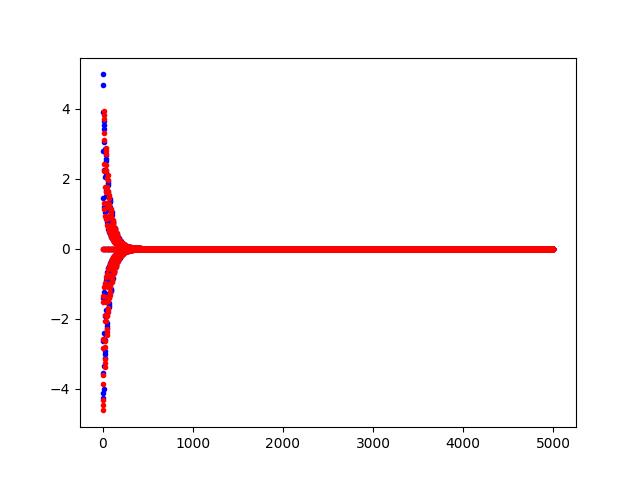

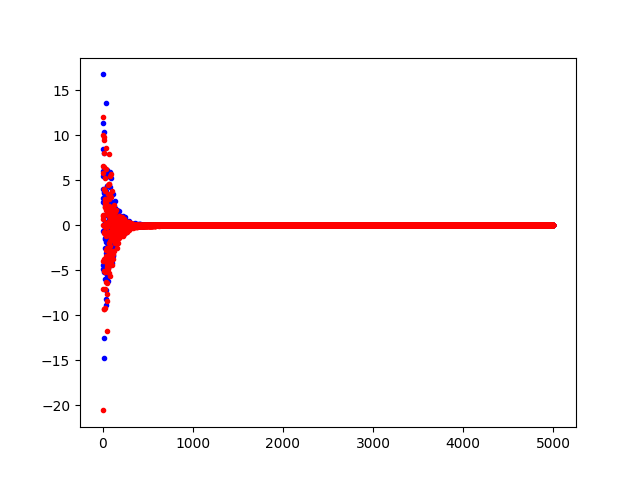

In [8]:
from scipy.fft import rfft, irfft, fftshift

G1 = 1.0
G2 = 1.0
E = 100.0
y  = 4.0

FT  = res_peak(X-E,G1,G2)
FTC = np.tile(FT.reshape(-1,1), (1,M))

FN  = np.random.normal(0,std_noise,N)
FNC = np.tile(FN.reshape(-1,1), (1,M))

FE = FT + FN
FEC = np.tile(FE.reshape(-1,1), (1,M))

GE = PoissonTransform(FE,X,y,theta)
GT = PoissonTransform(FT,X,y,theta)

FTGT = rfft(GT)*(-1)**np.arange(5001)
plt.figure(69)
plt.clf()
plt.plot(np.real(FTGT),'.b')
plt.plot(np.imag(FTGT),'.r')
plt.show()

FTGE = rfft(GE)
plt.figure(70)
plt.clf()
plt.plot(np.real(FTGE),'.b')
plt.plot(np.imag(FTGE),'.r')
plt.show()

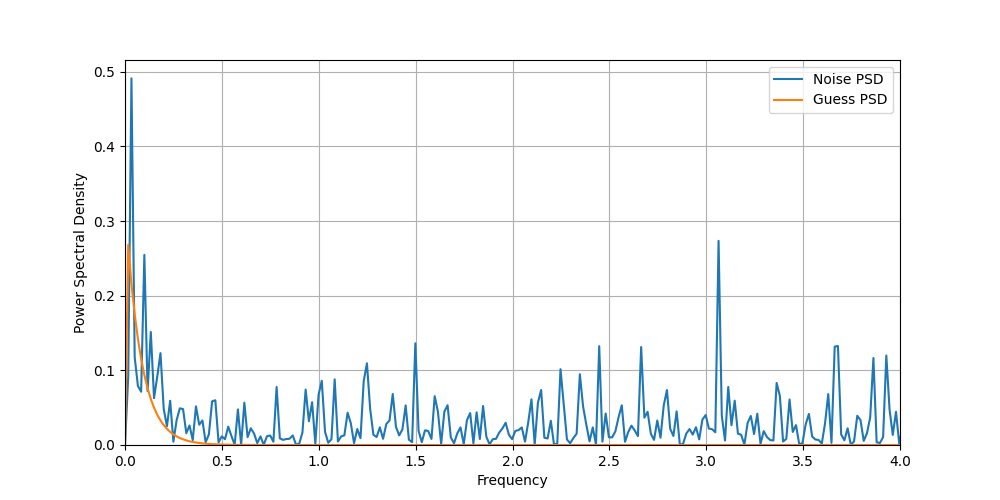

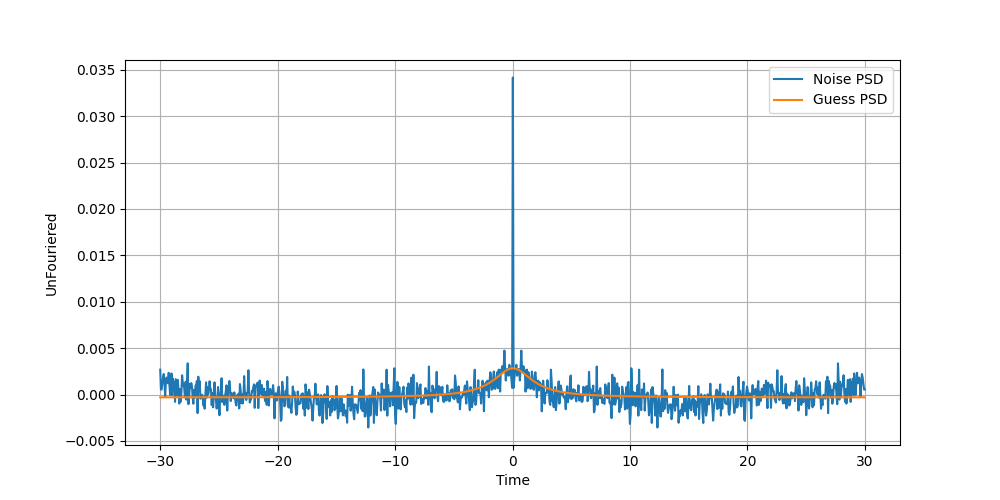

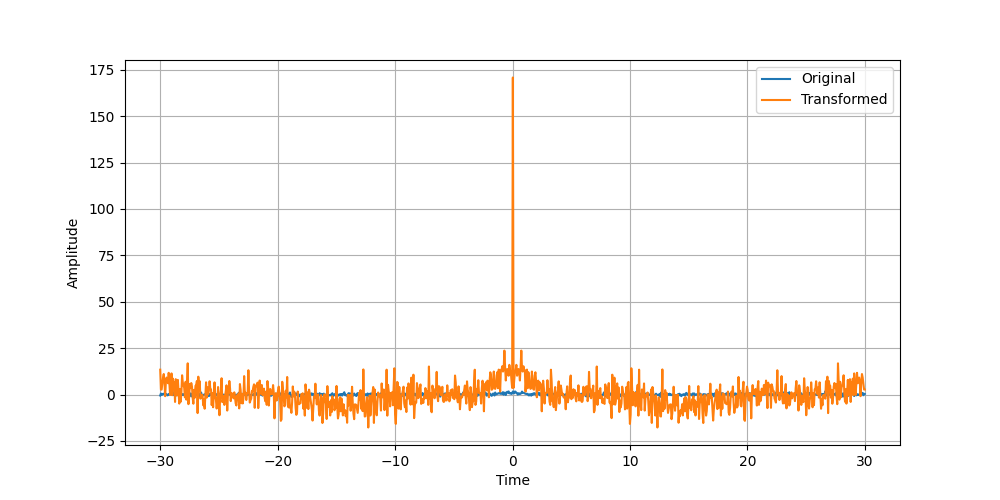

In [9]:
import numpy as np
from scipy.signal import periodogram

# Define the signal shape as a function
def f(t, a, b, c):
    return a/((t-b)**2 + c**2)

# Define the parameters of the signal
a_true = 1.0
b_true = 0.0
c_true = 1.0

a_guess = 1.0
b_guess = 0.0
c_guess = 1.0

# Define the time vector for the signal
t = np.linspace(-30, 30, 1000)

# Generate the noiseless signal and add Gaussian noise
y_true = f(t, a_true, b_true, c_true)
y_noise = y_true + 0.5*np.random.randn(len(y_true))
y_guess = f(t, a_guess, b_guess, c_guess)

# Estimate the power spectral density using the Wiener-Khinchin theorem
frequencies, psd_noise = periodogram(y_noise, fs=1/(t[1]-t[0]), scaling='density')
frequencies, psd_guess = periodogram(y_guess, fs=1/(t[1]-t[0]), scaling='density')
# psd_guess = f(frequencies, a_guess, b_guess, c_guess)**2
# psd_estimated = psd_guess / (psd_guess + psd_noise)


# Plot the results
plt.figure(71,figsize=(10,5))
plt.clf()
plt.plot(frequencies, psd_noise, label='Noise PSD')
plt.plot(frequencies, psd_guess, label='Guess PSD')
# plt.plot(frequencies, psd_estimated, label='Estimated PSD')
plt.xlim([0,4])
plt.ylim(bottom=0)
plt.grid()
plt.xlabel('Frequency')
plt.ylabel('Power Spectral Density')
plt.legend()
plt.show()

plt.figure(72,figsize=(10,5))
plt.clf()
plt.plot(t, fftshift(irfft(psd_noise)), label='Noise PSD')
plt.plot(t, fftshift(irfft(psd_guess)), label='Guess PSD')
# plt.plot(t, y_guess/(10*np.trapz(y_guess)), label='Guess PSD 2')
# plt.plot(frequencies, psd_estimated, label='Estimated PSD')
# plt.ylim(bottom=0)
plt.grid()
plt.xlabel('Time')
plt.ylabel('UnFouriered')
plt.legend()
plt.show()

noise_transformed = fftshift(irfft(psd_noise))
noise_transformed = noise_transformed*5000

plt.figure(73,figsize=(10,5))
plt.clf()
plt.plot(t, y_noise, label='Original')
plt.plot(t, noise_transformed, label='Transformed')
# plt.plot(t, y_guess/(10*np.trapz(y_guess)), label='Guess PSD 2')
# plt.plot(frequencies, psd_estimated, label='Estimated PSD')
# plt.ylim(bottom=0)
plt.grid()
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

# Testing Gaussian Processes

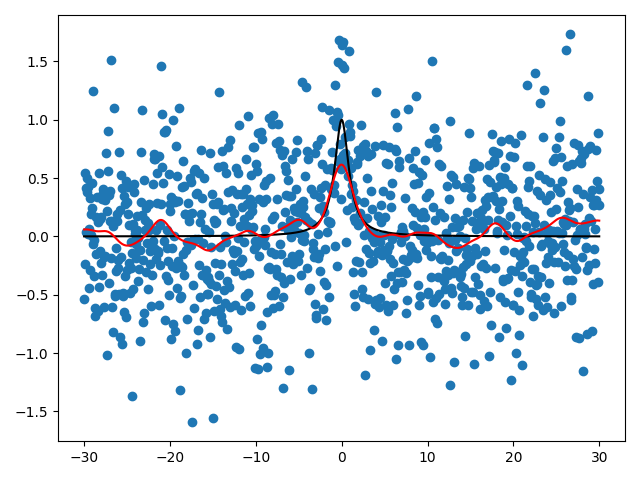

In [10]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RationalQuadratic

kernel = 1 * RationalQuadratic(length_scale=1.0, alpha=1.0, length_scale_bounds=(1e-5, 1000), alpha_bounds=(1, 1))
gaussian_process = GaussianProcessRegressor(kernel=kernel, alpha=0.25, n_restarts_optimizer=9)
gaussian_process.fit(t.reshape(-1, 1), y_noise)
gaussian_process.kernel_

mean_prediction, std_prediction = gaussian_process.predict(t.reshape(-1, 1), return_std=True)

plt.figure(100)
plt.clf()
plt.plot(t, y_true, '-k', label="True Data")
plt.scatter(t, y_noise, label="Observations")
plt.plot(t, mean_prediction, '-r', label="Mean prediction")
plt.tight_layout()
plt.show()